In [1]:
#Import Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model

In [ ]:
#Loading data from keras
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
# Normalising the data
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
#shape of train data is in H * W but for CNN input shape should be in H * W * C
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [ ]:
# Number of classes
K = len(set(y_train))
print("Number of classes :",K)

In [7]:
# Build the model (Functional API)

i = Input(shape=(x_train[0].shape))
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [8]:
# Build the compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train the model
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

In [10]:
#Evaluate the model
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3582 - accuracy: 0.9010


[0.35816869139671326, 0.9010000228881836]

**Observation:**

Getting a decent accuracy. But, its definitely, not as high as MNIST. Thats because, Fashion MNIST is a far more difficult dataset than MNIST.

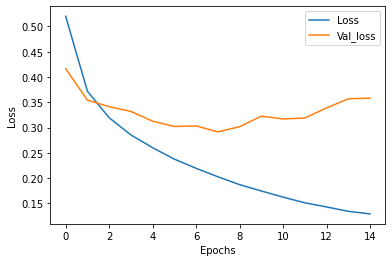

In [11]:
#Plot loss and val_loss
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

**Observation:**

It appears that the model is overfitting a little bit since we see that the validation loss is slightly going up.

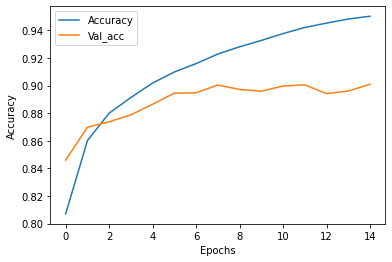

In [12]:
#Plot for accuracy
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [13]:
#Predictions
yhat = model.predict(x_test).argmax(axis=1)

In [14]:
# Metrics 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,yhat)
print(cm)

[[877   0  25  15   3   2  73   0   5   0]
 [  4 974   1  13   3   0   0   0   5   0]
 [ 15   1 857   7  54   0  65   0   1   0]
 [ 13   3  19 895  42   0  27   1   0   0]
 [  0   0  54  18 838   0  89   0   1   0]
 [  0   0   0   1   0 976   0  17   0   6]
 [128   1  78  21  67   0 689   0  16   0]
 [  0   0   0   0   0   9   0 964   0  27]
 [  3   0   4   3   1   3   8   2 976   0]
 [  0   0   0   1   0   4   1  30   0 964]]


In [15]:
#Label Mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()